In [ ]:
import numpy as np

In [145]:
data = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

In [146]:
X = data[:, 0]
y = data[:, 1]

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

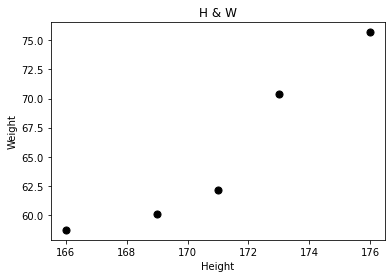

In [148]:
plt.scatter(X, y, c = 'k', s = 50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('H & W')
plt.show()

In [149]:
X -= X.mean()
y -= y.mean()

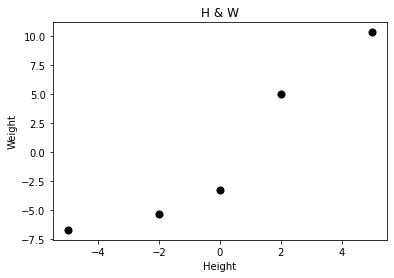

In [150]:
plt.scatter(X, y, c = 'k', s = 50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('H & W')
plt.show()

### 예측 계산

In [151]:
import torch
import warnings
warnings.filterwarnings('ignore')

In [152]:
X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [153]:
# 각각 Weight와 Bias의 초기값을 1로 설정
W = torch.tensor(1.0, requires_grad = True).float()
B = torch.tensor(1.0, requires_grad = True).float()

In [154]:
W, B

(tensor(1., requires_grad=True), tensor(1., requires_grad=True))

In [155]:
def pred(x) :
  return W * x + B

In [156]:
Yp = pred(X)

In [157]:
Yp

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)

In [158]:
from torchviz import make_dot

In [159]:
params = {'W' : W, 'B' : B}

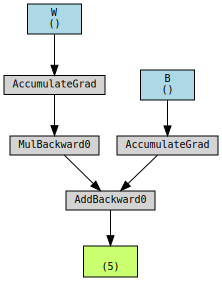

In [160]:
g = make_dot(Yp, params)
display(g)

### 손실 계산

In [161]:
def mse(pred, true) :
  loss = ((pred - true) ** 2).mean()
  return loss

In [162]:
loss = mse(Yp, y)

In [163]:
loss.item()

13.352002143859863

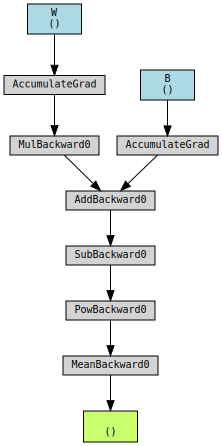

In [164]:
g = make_dot(loss, params = params)
display(g)

### 미분 계산


In [165]:
loss.backward()

In [166]:
W.grad, B.grad

(tensor(-19.0400), tensor(2.0000))

### 파라미터 수정

- 미분 계산이 끝나면 그 값에 학습률을 곱한 결과를 원래 값에서 뺀다.

In [167]:
lr = 0.001

In [76]:
W -= lr * W.grad
B -= lr * B.grad

RuntimeError: ignored

위의 코드로는 미분 대상인 두 변수가 외부(계산 과정)에 영향을 주므로 임의로 수정이 불가하다. 

이런 경우 with torch.no_grad()라는 코드를 통해 일시적으로 내부에서 계산 그래프 생성을 하지 못하게 한다.

In [168]:
with torch.no_grad() :

  W -= lr * W.grad
  B -= lr * B.grad

  W.grad.zero_()
  B.grad.zero_()

In [169]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


### 반복 계산

In [175]:
W = torch.tensor(1.0, requires_grad = True, dtype = torch.float)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float)

In [176]:
num_epochs = 500

In [177]:
lr = 0.001

In [178]:
history = np.zeros((0, 2))

In [179]:
for epoch in range(num_epochs) :
  Yp = pred(X)

  loss = mse(Yp, y)

  loss.backward()
  with torch.no_grad() :

    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()

  if (epoch % 10 == 0) :
    
    loss_value = np.array([epoch, loss.item()])
    history = np.vstack((history, loss_value))
    print(f'Epoch : {epoch} loss = {loss:.4f}')

Epoch : 0 loss = 13.3520
Epoch : 10 loss = 10.3855
Epoch : 20 loss = 8.5173
Epoch : 30 loss = 7.3364
Epoch : 40 loss = 6.5858
Epoch : 50 loss = 6.1047
Epoch : 60 loss = 5.7927
Epoch : 70 loss = 5.5868
Epoch : 80 loss = 5.4476
Epoch : 90 loss = 5.3507
Epoch : 100 loss = 5.2805
Epoch : 110 loss = 5.2275
Epoch : 120 loss = 5.1855
Epoch : 130 loss = 5.1507
Epoch : 140 loss = 5.1208
Epoch : 150 loss = 5.0943
Epoch : 160 loss = 5.0703
Epoch : 170 loss = 5.0480
Epoch : 180 loss = 5.0271
Epoch : 190 loss = 5.0074
Epoch : 200 loss = 4.9887
Epoch : 210 loss = 4.9708
Epoch : 220 loss = 4.9537
Epoch : 230 loss = 4.9373
Epoch : 240 loss = 4.9217
Epoch : 250 loss = 4.9066
Epoch : 260 loss = 4.8922
Epoch : 270 loss = 4.8783
Epoch : 280 loss = 4.8650
Epoch : 290 loss = 4.8522
Epoch : 300 loss = 4.8399
Epoch : 310 loss = 4.8281
Epoch : 320 loss = 4.8167
Epoch : 330 loss = 4.8058
Epoch : 340 loss = 4.7953
Epoch : 350 loss = 4.7853
Epoch : 360 loss = 4.7756
Epoch : 370 loss = 4.7663
Epoch : 380 loss = 4.

In [180]:
### 최종 파라미터
print(f'W = {W.data}')
print(f'B = {B.data}')

W = 1.8206830024719238
B = 0.3675113916397095


In [181]:
### 손실 변화
print(f'초기 상태 손실 = {history[0, 1]:.4f}')
print(f'최종 상태 손실 = {history[-1, 1]:.4f}')

초기 상태 손실 = 13.3520
최종 상태 손실 = 4.6796


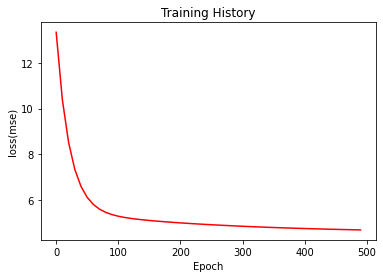

In [184]:
plt.plot(history[:, 0], history[:, 1], color = 'r')
plt.xlabel('Epoch')
plt.ylabel('loss(mse)')
plt.title('Training History')
plt.show()

### 최적화 함수 & Step 함수

In [212]:
W = torch.tensor(1.0, requires_grad = True, dtype = torch.float)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float)

In [213]:
num_epochs = 500

In [214]:
lr = 0.001

In [215]:
import torch.optim as optim
opt = optim.SGD([W, B], lr = lr)

In [216]:
history = np.zeros((0, 2))

with torch.no_grad()로 파라미터를 수정했던 부분을 최적화 함수를 이용해 변환

In [217]:
for epoch in range(num_epochs) :
  Yp = pred(X)

  loss = mse(Yp, y)

  loss.backward()

  opt.step() # 파라미터 수정

  opt.zero_grad() # 미분값 초기화

  '''
  with torch.no_grad() :

    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()
  '''

  if (epoch % 10 == 0) :
    
    loss_value = np.array([epoch, loss.item()])
    history = np.vstack((history, loss_value))
    print(f'Epoch : {epoch} loss = {loss:.4f}')

Epoch : 0 loss = 13.3520
Epoch : 10 loss = 10.3855
Epoch : 20 loss = 8.5173
Epoch : 30 loss = 7.3364
Epoch : 40 loss = 6.5858
Epoch : 50 loss = 6.1047
Epoch : 60 loss = 5.7927
Epoch : 70 loss = 5.5868
Epoch : 80 loss = 5.4476
Epoch : 90 loss = 5.3507
Epoch : 100 loss = 5.2805
Epoch : 110 loss = 5.2275
Epoch : 120 loss = 5.1855
Epoch : 130 loss = 5.1507
Epoch : 140 loss = 5.1208
Epoch : 150 loss = 5.0943
Epoch : 160 loss = 5.0703
Epoch : 170 loss = 5.0480
Epoch : 180 loss = 5.0271
Epoch : 190 loss = 5.0074
Epoch : 200 loss = 4.9887
Epoch : 210 loss = 4.9708
Epoch : 220 loss = 4.9537
Epoch : 230 loss = 4.9373
Epoch : 240 loss = 4.9217
Epoch : 250 loss = 4.9066
Epoch : 260 loss = 4.8922
Epoch : 270 loss = 4.8783
Epoch : 280 loss = 4.8650
Epoch : 290 loss = 4.8522
Epoch : 300 loss = 4.8399
Epoch : 310 loss = 4.8281
Epoch : 320 loss = 4.8167
Epoch : 330 loss = 4.8058
Epoch : 340 loss = 4.7953
Epoch : 350 loss = 4.7853
Epoch : 360 loss = 4.7756
Epoch : 370 loss = 4.7663
Epoch : 380 loss = 4.

In [193]:
### 최종 파라미터
print(f'W = {W.data}')
print(f'B = {B.data}')

W = 1.820683479309082
B = 0.36456814408302307


In [194]:
### 손실 변화
print(f'초기 상태 손실 = {history[0, 1]:.4f}')
print(f'최종 상태 손실 = {history[-1, 1]:.4f}')

초기 상태 손실 = 12.6358
최종 상태 손실 = 4.6774


In [195]:
'''
with torch.no_grad() :
  W -= lr * W.grad
  B -= lr * B.grad
'''

'''
opt.step()
'''

'\nopt.step()\n'

In [207]:
W = torch.tensor(1.0, requires_grad = True, dtype = torch.float)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float)

In [208]:
opt = optim.SGD([W, B], lr = lr, momentum = 0.9)

In [209]:
history2 = np.zeros((0, 2))

In [210]:
for epoch in range(num_epochs) :
  Yp = pred(X)

  loss = mse(Yp, y)

  loss.backward()

  opt.step() # 파라미터 수정

  opt.zero_grad() # 미분값 초기화

  '''
  with torch.no_grad() :

    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()
  '''

  if (epoch % 10 == 0) :
    
    loss_value = np.array([epoch, loss.item()])
    history2 = np.vstack((history2, loss_value))
    print(f'Epoch : {epoch} loss = {loss:.4f}')

Epoch : 0 loss = 13.3520
Epoch : 10 loss = 5.7585
Epoch : 20 loss = 5.9541
Epoch : 30 loss = 5.0276
Epoch : 40 loss = 4.8578
Epoch : 50 loss = 4.7052
Epoch : 60 loss = 4.6327
Epoch : 70 loss = 4.5940
Epoch : 80 loss = 4.5698
Epoch : 90 loss = 4.5574
Epoch : 100 loss = 4.5495
Epoch : 110 loss = 4.5452
Epoch : 120 loss = 4.5426
Epoch : 130 loss = 4.5411
Epoch : 140 loss = 4.5403
Epoch : 150 loss = 4.5398
Epoch : 160 loss = 4.5395
Epoch : 170 loss = 4.5393
Epoch : 180 loss = 4.5392
Epoch : 190 loss = 4.5391
Epoch : 200 loss = 4.5391
Epoch : 210 loss = 4.5391
Epoch : 220 loss = 4.5391
Epoch : 230 loss = 4.5390
Epoch : 240 loss = 4.5390
Epoch : 250 loss = 4.5390
Epoch : 260 loss = 4.5390
Epoch : 270 loss = 4.5390
Epoch : 280 loss = 4.5390
Epoch : 290 loss = 4.5390
Epoch : 300 loss = 4.5390
Epoch : 310 loss = 4.5390
Epoch : 320 loss = 4.5390
Epoch : 330 loss = 4.5390
Epoch : 340 loss = 4.5390
Epoch : 350 loss = 4.5390
Epoch : 360 loss = 4.5390
Epoch : 370 loss = 4.5390
Epoch : 380 loss = 4.5

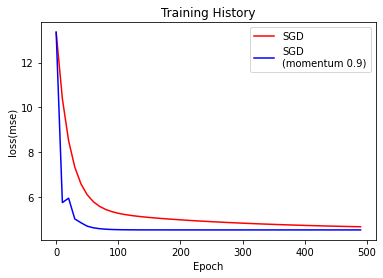

In [220]:
plt.plot(history[:, 0], history[:, 1], color = 'r', label = 'SGD')
plt.plot(history2[:, 0], history2[:, 1], color = 'b', label = 'SGD\n(momentum 0.9)')
plt.xlabel('Epoch')
plt.ylabel('loss(mse)')
plt.title('Training History')
plt.legend()
plt.show()